<a href="https://colab.research.google.com/github/shouvikcirca/LLMs/blob/openai/langGraph1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# ! pip install -U langgraph langsmith
# ! pip install python-dotenv
# ! pip install openai
# ! pip install -qU langchain-openai

In [2]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [8]:
from dotenv import load_dotenv, find_dotenv
import os
import sys
import openai

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [9]:
a = load_dotenv('drive/MyDrive/env')
openai.api_key = os.environ['OPENAI_API_KEY']

In [3]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [12]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-3.5-turbo-0125", api_key=openai.api_key)

In [13]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

In [14]:
graph_builder.add_node("chatbot", chatbot)

In [15]:
graph_builder.add_edge(START, "chatbot")

In [16]:
graph_builder.add_edge("chatbot", END)

In [17]:
graph = graph_builder.compile()

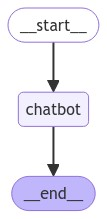

In [18]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [21]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": ("user", user_input)}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

KeyboardInterrupt: Interrupted by user